# Natural language processing

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
df = pd.read_csv('./datasets/toxic.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [142]:
df_result = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
pd.options.mode.chained_assignment = None

f = 'not_toxic'
def f(row):
    if sum(row) == 0:
        return 1
    else:
        return 0

df_result['not_toxic'] = df_result.apply(f, axis=1) 
df_result.head(10)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,not_toxic
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1
6,1,1,1,0,1,0,0
7,0,0,0,0,0,0,1
8,0,0,0,0,0,0,1
9,0,0,0,0,0,0,1


In [144]:
new_df = pd.DataFrame()
new_df['categ'] = df_result.sum().index
new_df['count'] = df_result.sum().values
#new_df.head()
df_sort = new_df.sort_values(by = 'count', ascending = False)

df_sort.head(10)

,categ,count
6,not_toxic,143346
0,toxic,15294
2,obscene,8449
4,insult,7877
1,severe_toxic,1595
5,identity_hate,1405
3,threat,478


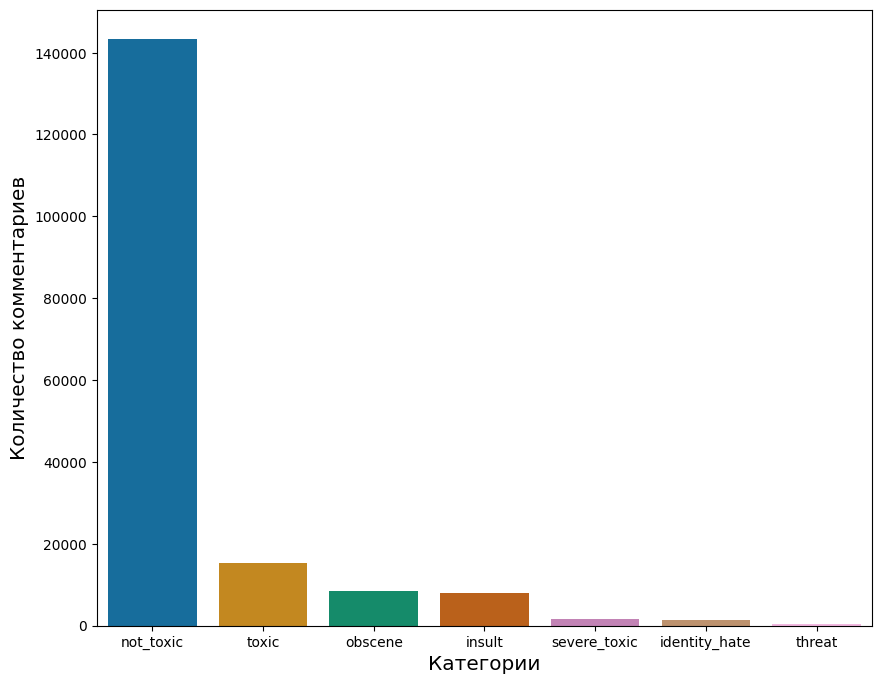

In [145]:
plt.figure(figsize=(10,8))
ax=sns.barplot(y=df_sort['count'], x=df_sort['categ'], palette='colorblind')
ax.set_ylabel('Количество комментариев', fontsize = 'x-large')
ax.set_xlabel('Категории', fontsize = 'x-large')
ax.tick_params(axis='x', labelrotation = 0)

Количество токенов для комментария с индексом `000103f0d9cfb60f`

In [146]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

df['not_toxic'] = df_result['not_toxic']
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not_toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


In [147]:
nltk.download('stopwords', quiet = True)
nltk.download('punkt', quiet = True)

def tokenization(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    tokens = [token for token in tokens if token.isalpha()]
    return tokens

df_com = df.copy()
df_com['comment_text'] = df_com['comment_text'].str.lower()
df_com['tokens'] = df_com['comment_text'].apply(tokenization)

df_com.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not_toxic,tokens
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,1,"[explanation, edits, made, username, hardcore,..."
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,1,"[matches, background, colour, seemingly, stuck..."
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,1,"[hey, man, really, trying, edit, war, guy, con..."
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,1,"[ca, make, real, suggestions, improvement, won..."
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,1,"[sir, hero, chance, remember, page]"


In [148]:
token_result = df_com[df_com['id'] == '000103f0d9cfb60f']['tokens'].values[0]
print('Количество токенов для комментария с индексом 000103f0d9cfb60f:', len(token_result))

Количество токенов для комментария с индексом 000103f0d9cfb60f: 9


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#df_com['train'] =[''.join(token) for token in df_com['tokens']]

#X, y = df_com['train'], df_com[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'not_toxic']]
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.3, shuffle=True)

#model = TfidfVectorizer(max_features=3000) 
#X_train_set = model.fit_transform(X_train)

df_com['train'] = [' '.join(token) for token in df_com['tokens']]
X = df_com['train']
y = df_com[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'not_toxic']]
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state=21, test_size=0.3, shuffle=True)

model = TfidfVectorizer(max_features=3000)
X_train_set = model.fit_transform(X_train)

display(df_com.head())
print('Размерность тренировачной выборки после преобразования текста:', X_train_set.shape)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not_toxic,tokens,joined,train
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,1,"[explanation, edits, made, username, hardcore,...",explanation edits made username hardcore metal...,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,1,"[matches, background, colour, seemingly, stuck...",matches background colour seemingly stuck than...,matches background colour seemingly stuck than...
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,1,"[hey, man, really, trying, edit, war, guy, con...",hey man really trying edit war guy constantly ...,hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,1,"[ca, make, real, suggestions, improvement, won...",ca make real suggestions improvement wondered ...,ca make real suggestions improvement wondered ...
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,1,"[sir, hero, chance, remember, page]",sir hero chance remember page,sir hero chance remember page


Размерность тренировачной выборки после преобразования текста: (111699, 3000)


Задача Multi-Label классификации используя RidgeClassifier

In [151]:
from sklearn.linear_model import RidgeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

model_1 = RidgeClassifier()
model_1.fit(X_train_set, y_train)
X_test_set = model.transform(X_test)
y_pred = model_1.predict(X_test_set)
roc_auc = roc_auc_score(y_test, y_pred)
print('Значение ROC-AUC для тестовой выборки', roc_auc)

Значение ROC-AUC для тестовой выборки 0.6641802122415228


4 признака, которые могут помочь в обучении модели. Добавляем их к признакам TF-IDF и обучаем модель. 

In [152]:
toxic_com = pd.DataFrame(df[df['toxic']==1])
toxic_com

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not_toxic
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,0
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1,0
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0,0


In [153]:
#Признаки:
#    1) CapsLock
#    2) Много восклицательных знаков
#    3) Многоточие
#    4) Зацензуривание слов

In [154]:
nltk.download('stopwords', quiet = True)
#sw_up = word.upper() for word in stopwords.words('english')
df_com_new = df.copy()

def tokenization_new(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    tokens = [token for token in tokens if token not in [word.upper() for word in stopwords.words('english')]]
    tokens = [token for token in tokens if not token.isdigit()]
    return tokens

#df_com_new['comment_text'] = df_com_new['comment_text'].str.lower()
df_com_new['tokens'] = df_com_new['comment_text'].apply(tokenization_new)

df_com_new.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not_toxic,tokens
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,"[Explanation, Why, edits, made, username, Hard..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,"[D'aww, !, He, matches, background, colour, 'm..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,"[Hey, man, ,, 'm, really, trying, edit, war, ...."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,"[``, More, ca, n't, make, real, suggestions, i..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,"[You, ,, sir, ,, hero, ., Any, chance, remembe..."


In [155]:
df_com_new['train'] = [' '.join(token) for token in df_com_new['tokens']]

X_1, y_1 = df_com_new['train'], df_com_new[['toxic','severe_toxic', 'obscene','threat', 'insult','identity_hate', 'not_toxic']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, random_state=21, test_size=0.3, shuffle=True)

model_2 = TfidfVectorizer(max_features=3000)
X_train_set_1 = model_2.fit_transform(X_train1)

model_3 = RidgeClassifier()
model_3.fit (X_train_set_1, y_train1)

X_test_set_1 = model_2.transform(X_test1)
y_pred1 = model_3.predict (X_test_set_1)

display(roc_auc_1 = roc_auc_score(y_test1, y_pred1))

In [156]:
#Подсчитываем все признаки:

#1) CapsLock
upper = df_com_new['comment_text'].str.isupper()
capslock = sum(bool(x) for x in upper)
capslock_train = X_train1.apply(lambda x:(len(x.split()))/capslock)
capslock_test = X_test1.apply (lambda x:(len(x.split ()))/capslock)

In [157]:
#2) Много восклицательных знаков
exc_mark_train = df_com_new.loc [X_train1.index]['comment_text'].apply (lambda x: x.count('!'))
exc_mark_test = df_com_new.loc [X_test1.index]['comment_text'].apply(lambda x: x.count('!'))

In [158]:
#3) Многоточие
ellipsis_train = df_com_new.loc[X_train1.index]['comment_text'].apply (lambda x: x.count('.'))
ellipsis_test = df_com_new.loc[X_test1.index]['comment_text'].apply (lambda x: x.count ('.'))

In [159]:
#4) Зацензуренные слов
star_train = df_com_new.loc[X_train1.index]['comment_text'].apply (lambda x: x.count('**'))
star_test = df_com_new.loc[X_test1.index]['comment_text'].apply(lambda x: x.count('*'))

underscore_train = df_com_new.loc[X_train1.index]['comment_text'].apply (lambda x: x.count('_'))
underscore_test = df_com_new.loc[X_test1.index]['comment_text'].apply (lambda x: x.count('_'))

In [160]:
#Объединяем всё подсчитанное
#Вычислем новое значение ROC-AUC
#Высчитываем увеличение

from scipy.sparse import hstack 
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings('ignore')

Train_matrix = csr_matrix(np.array([star_train, underscore_train, ellipsis_train, capslock_train, exc_mark_train]).T)
Test_matrix = csr_matrix(np.array([star_test, underscore_test, ellipsis_test, capslock_test, exc_mark_test]).T)
X_train_hstack = hstack((X_train_set_1, Train_matrix))
X_test_hstack = hstack((X_test_set_1, Test_matrix))

model_hstack = RidgeClassifier() 
model_hstack.fit(X_train_combined, y_train1)

y_pred2 = model_hstack.predict(X_test_hstack)
roc_auc_2 = roc_auc_score(y_test1, y_pred2)

print('Новое значение ROC-AUC:', roc_auc_2)
print('Увеличение ROC-AUC на', (roc_auc_2 - roc_auc))

Новое значение ROC-AUC: 0.6643948295831908
Увеличение ROC-AUC на 0.00021461734166805524
